In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [18]:
print("My name in Hindi is : \n","\u0932\u094B\u0915\u0947\u0937","\u092c\u0921\u0947\u0932\u093e")

My name in Hindi is : 
 लोकेष बडेला


# DATA COLLECTION

In [20]:
# Data Collection
file_path = 'temperatures.csv'
data = pd.read_csv(file_path)

# DATA DESCRIPTION

In [22]:
#Data Description
df = pd.DataFrame(data)
numeric_summary = df.describe()
# Summary for non-numerical (categorical) columns
print("the numerical data is : \n",numeric_summary,"\n\n")

the numerical data is : 
               YEAR        JAN        FEB        MAR        APR        MAY  \
count    86.000000  86.000000  86.000000  86.000000  86.000000  86.000000   
mean   1960.500000  23.317209  25.518023  29.031744  31.903023  33.511395   
std      24.969982   0.705404   0.892805   0.817013   0.761967   0.688665   
min    1918.000000  22.060000  23.680000  27.310000  30.240000  32.050000   
25%    1939.250000  22.802500  24.890000  28.587500  31.502500  33.102500   
50%    1960.500000  23.225000  25.450000  29.010000  31.950000  33.470000   
75%    1981.750000  23.840000  26.187500  29.505000  32.367500  33.985000   
max    2003.000000  24.750000  27.400000  30.860000  33.770000  35.840000   

             JUN        JUL        AUG        SEP        OCT        NOV  \
count  86.000000  86.000000  86.000000  86.000000  86.000000  86.000000   
mean   32.776163  30.995000  30.464884  30.476395  29.707209  27.233023   
std     0.595292   0.446107   0.392832   0.485575   0.5

# DATA WRANGLING

In [24]:
# Data Wrangling
print("\nNull Values:\n", data.isnull().sum())


Null Values:
 YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64


In [25]:
# Check data types
print("\nData Types:\n", data.dtypes)


Data Types:
 YEAR         int64
JAN        float64
FEB        float64
MAR        float64
APR        float64
MAY        float64
JUN        float64
JUL        float64
AUG        float64
SEP        float64
OCT        float64
NOV        float64
DEC        float64
ANNUAL     float64
JAN-FEB    float64
MAR-MAY    float64
JUN-SEP    float64
OCT-DEC    float64
dtype: object


# ADDING PCA COMPONENT AND GRAPH OF MSE TRAIN VS TEST

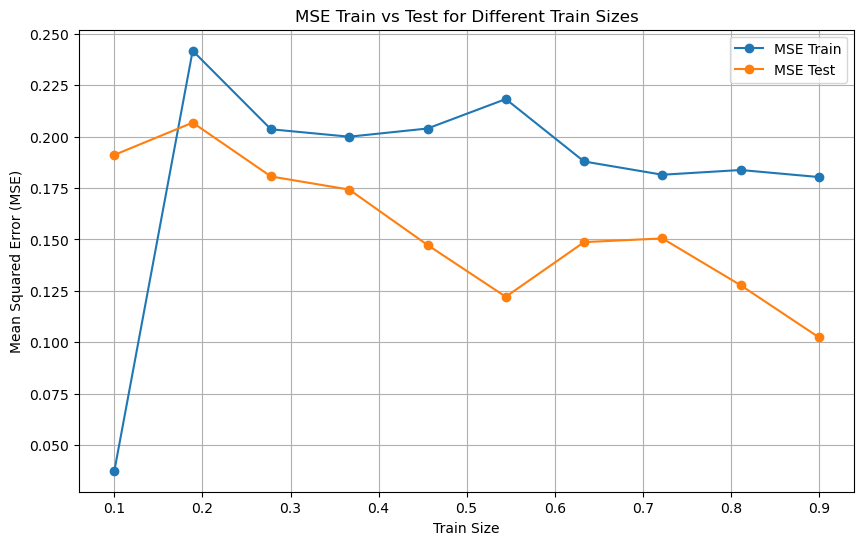

Highest correlated feature: ANNUAL
Best Test MSE: 0.10238425417471748, Train size: 0.9, Test size: 0.09999999999999998


In [27]:
# Step 1: Standardize the data (after removing 'YEAR')
data = data.drop(columns=['YEAR'])
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 2: Perform PCA and extract the first component
pca = PCA(n_components=1)
pca_result = pca.fit_transform(data_scaled)

# Add the PCA component to the DataFrame
data['PCA'] = pca_result[:, 0]

# Step 3: Find correlation between original features and PCA
correlations = data.corr()
pca_correlation = correlations['PCA'][:-1]  # Exclude PCA itself from correlation

# Step 4: Select the highest correlated feature
top_two_features = pca_correlation.abs().sort_values(ascending=False).head(2).index
input_feature_1 = top_two_features[0]
input_feature_2 = top_two_features[1]
highest_correlated_feature = pca_correlation.abs().idxmax()  # Get the feature with the highest correlation
X = data[[highest_correlated_feature]].values  # Use this feature as the input (X)
y = data['PCA'].values  # PCA as the output (y)

# Step 5: Train 10 models and calculate MSE for each
best_model = None
min_mse_test = float('inf')
best_X_train = None
best_X_test = None
best_y_train = None
best_y_test = None
best_train_size = None
best_test_size = None
mse_train_values = []
mse_test_values = []

model = LinearRegression()

for train_size in np.linspace(0.1, 0.9, 10):  # 10 models with different train sizes
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
    
    # Train Linear Regression model
    
    model.fit(X_train, y_train)
    
    # Predict on both training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Compute MSE for both training and test sets
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    # Append the MSE values to the list
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)
    
    # Check if the current model has the minimum test MSE
    if mse_test < min_mse_test:
        min_mse_test = mse_test
        best_model = model
        best_X_train, best_X_test = X_train, X_test
        best_y_train, best_y_test = y_train, y_test
        best_train_size = train_size
        best_test_size = 1 - train_size

# Step 6: Plot the MSE values
plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0.1, 0.9, 10), mse_train_values, label='MSE Train', marker='o')
plt.plot(np.linspace(0.1, 0.9, 10), mse_test_values, label='MSE Test', marker='o')
plt.title('MSE Train vs Test for Different Train Sizes')
plt.xlabel('Train Size')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Print the highest correlated feature
print(f"Highest correlated feature: {highest_correlated_feature}")
# Print the best test MSE for verification
print(f"Best Test MSE: {min_mse_test}, Train size: {best_train_size}, Test size: {best_test_size}")
# print(data[top_two_features].values)

# LINEAR REGRESSION MODEL

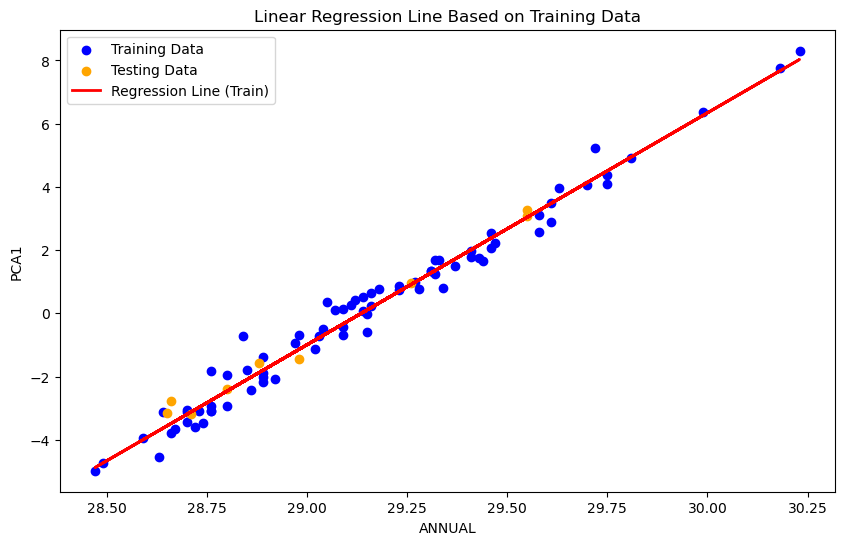

In [29]:
# Train the Linear Regression model on the training data only
model.fit(best_X_train, best_y_train)

# Predict the values using the training and test datasets separately
y_train_pred_full = model.predict(best_X_train)
y_test_pred_full = model.predict(best_X_test)

# Plot the actual vs predicted values based on the training and testing datasets
plt.figure(figsize=(10, 6))
plt.scatter(best_X_train, best_y_train, label="Training Data", color="blue")
plt.scatter(best_X_test, best_y_test, label="Testing Data", color="orange")
plt.plot(best_X_train, y_train_pred_full, label="Regression Line (Train)", color="red", linewidth=2)
plt.xlabel(input_feature_1)
plt.ylabel("PCA1")
plt.title("Linear Regression Line Based on Training Data")
plt.legend()
plt.show()

# 3D MODEL WITH REGRESSION PLANE

In [31]:
# Prepare the data for 3D modeling with two input features
X_double = data[[input_feature_1, input_feature_2]]

# Split the data for 3D model
X_train_3d, X_test_3d, y_train_3d, y_test_3d = train_test_split(X_double, y, train_size=0.8, random_state=42)

# Train the Linear Regression model using training data only
model.fit(X_train_3d, y_train_3d)

# Create a meshgrid for 3D plotting using the range of training data
x_surf, y_surf = np.meshgrid(np.linspace(X_train_3d[input_feature_1].min(), X_train_3d[input_feature_1].max(), 100),
                             np.linspace(X_train_3d[input_feature_2].min(), X_train_3d[input_feature_2].max(), 100))
z_surf = model.predict(np.array([x_surf.ravel(), y_surf.ravel()]).T)
z_surf = z_surf.reshape(x_surf.shape)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


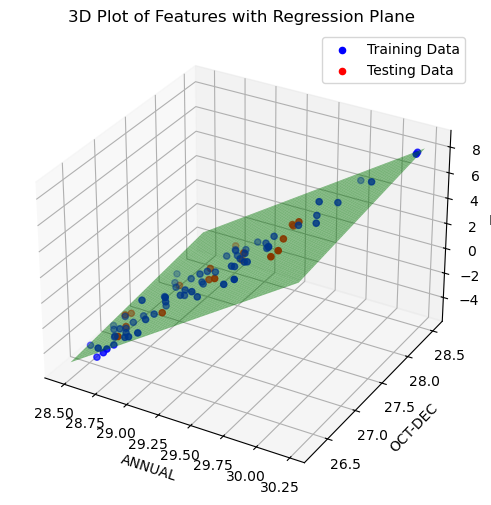

In [32]:
# 3D Plot of the Features with the regression plane
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot training data
ax.scatter(X_train_3d[input_feature_1], X_train_3d[input_feature_2], y_train_3d, color='blue', label='Training Data')
# Plot testing data
ax.scatter(X_test_3d[input_feature_1], X_test_3d[input_feature_2], y_test_3d, color='red', label='Testing Data')

# Plot the regression plane
ax.plot_surface(x_surf, y_surf, z_surf, color='green', alpha=0.5)

ax.set_xlabel(input_feature_1)
ax.set_ylabel(input_feature_2)
ax.set_zlabel('PCA')
ax.set_title('3D Plot of Features with Regression Plane')
ax.legend()

plt.show()
